<a href="https://colab.research.google.com/github/Mehak3360/Sampling/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.utils import resample
df=pd.read_csv("/content/Creditcard_data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df['Class'].value_counts()

,count
Class,
0,763
1,9


In [6]:
!pip install imbalanced-learn

In [7]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

df_balanced = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['Class'])], axis=1)

print(df_balanced.Class.value_counts())

Class
0    763
1    763
Name: count, dtype: int64


In [8]:
sample1 = df_balanced.sample(frac=0.9, random_state=1)
sample2 = df_balanced.sample(frac=0.8, random_state=2)
sample3 = df_balanced.sample(frac=0.7, random_state=3)
sample4 = df_balanced.sample(frac=0.6, random_state=4)
sample5 = df_balanced.sample(frac=0.5, random_state=5)

samples = [sample1, sample2, sample3, sample4, sample5]

In [9]:
#Simple Random Sampling
def sampling1(data):
    return data.sample(frac=0.8)

#Systematic Sampling
def sampling2(data):
    step = 2
    return data.iloc[::step]

#Stratified Sampling
from sklearn.model_selection import train_test_split

def sampling3(data):
    X = data.drop('Class', axis=1)
    y = data['Class']
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    return pd.concat([X_train, y_train], axis=1)

# Cluster Sampling
import numpy as np

def sampling4(data):
    clusters = np.array_split(data, 5)
    return clusters[0]

#Bootstrap Sampling
def sampling5(data):
    return data.sample(frac=1, replace=True)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

sampling_methods = [sampling1, sampling2, sampling3, sampling4, sampling5]

results = pd.DataFrame(columns=["Sampling1","Sampling2","Sampling3","Sampling4","Sampling5"],
                       index=["M1","M2","M3","M4","M5"])

for m_index, model in enumerate(models):

    for s_index, sampling in enumerate(sampling_methods):

        # Apply sampling on balanced dataset
        sampled_data = sampling(df_balanced)

        X = sampled_data.drop('Class', axis=1)
        y = sampled_data['Class']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred) * 100

        results.iloc[m_index, s_index] = round(acc, 2)

results

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1,92.1,89.08,91.59,95.65,93.89
M2,83.65,77.73,81.0,97.83,87.55
M3,95.91,96.94,96.88,97.83,98.47
M4,100.0,100.0,100.0,97.83,99.78
M5,67.03,68.12,66.67,97.83,65.5


In [12]:
best_sampling = results.idxmax(axis=1)
best_sampling

,0
M1,Sampling4
M2,Sampling4
M3,Sampling5
M4,Sampling1
M5,Sampling4


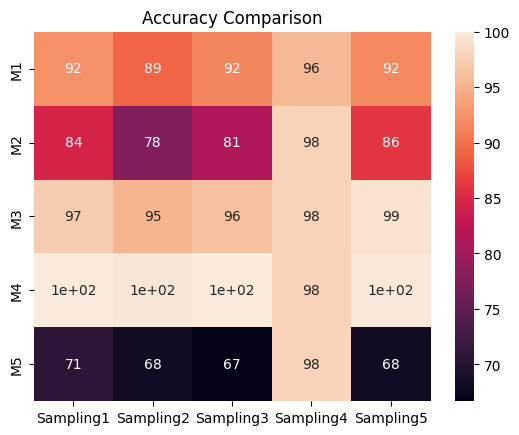

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(results.astype(float), annot=True)
plt.title("Accuracy Comparison")
plt.show()